In [1]:
from data import Dataset
import numpy as np
import matplotlib.pyplot as plt
from utils import modularity
from sc_sr import SC_SR
from itertools import permutations
from metrics import purity_score, nmi_score, ri_score
%reload_ext autoreload
%autoreload 2

c:\Users\souhm\anaconda3\envs\NewEnv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
def clustering_SC_SR(dataset,verbose=True,node_size=50,markersize=3): 
    dataset = Dataset(dataset, preprocess=False)
    dataset.display(node_size=node_size,markersize=markersize)
    W = dataset.MLG
    k = np.unique(dataset.labels).shape[0]
    _lambda = [1 for i in range(len(W)-1)]
    true_labels = dataset.labels
    ranking = [i for i in range(len(W))]
    all_permutations = list(permutations(ranking))
    N = len(true_labels)
    print("number of clusers ",k)
    ground_truth_clustering = {i: true_labels[i] for i in range(N)}
    
    scores = list()
    i = 0
    rank = {}
    for ranking in all_permutations:
        labels = SC_SR(W, k, _lambda, ranking)
        clustering = {i: labels[i] for i in range(N)}
        purity = purity_score(clustering, ground_truth_clustering)
        nmi = nmi_score(clustering, ground_truth_clustering)
        ri = ri_score(clustering, ground_truth_clustering)
        rank[i] = ranking
        scores.append((purity,nmi,ri))
        i+=1
        sorted_scores = sorted(scores, key=lambda x: x[0],reverse=True)
        purity_scores = [x[0] for x in sorted_scores]
        nmi_scores = [x[1] for x in sorted_scores]
        ri_scores = [x[2] for x in sorted_scores]
    print("purity ",sorted_scores[0][0])
    print("nmi ",sorted_scores[0][1])
    print("ri ",sorted_scores[0][2])
    print("best ranking is ",rank[scores.index(sorted_scores[0])])
    
    if verbose: 
        plt.figure(figsize=(10, 6))
        plt.plot(range(len(sorted_scores)), purity_scores, label="Purity Score", linestyle='-', color='blue', markersize=3)
        plt.plot(range(len(sorted_scores)), nmi_scores, label="NMI Score", linestyle='--', color='green', markersize=3)
        plt.plot(range(len(sorted_scores)), ri_scores, label="RI Score", linestyle='-.', color='red', markersize=3)
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.xticks([])
        # Save the plot to a file (optional)
        # plt.savefig('clustering_evaluation.png', dpi=300, bbox_inches='tight')
        plt.show()

# Aucs

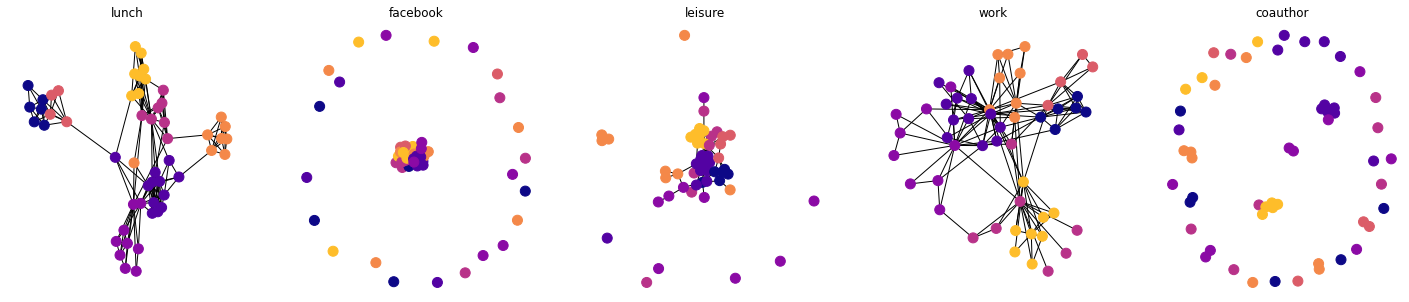

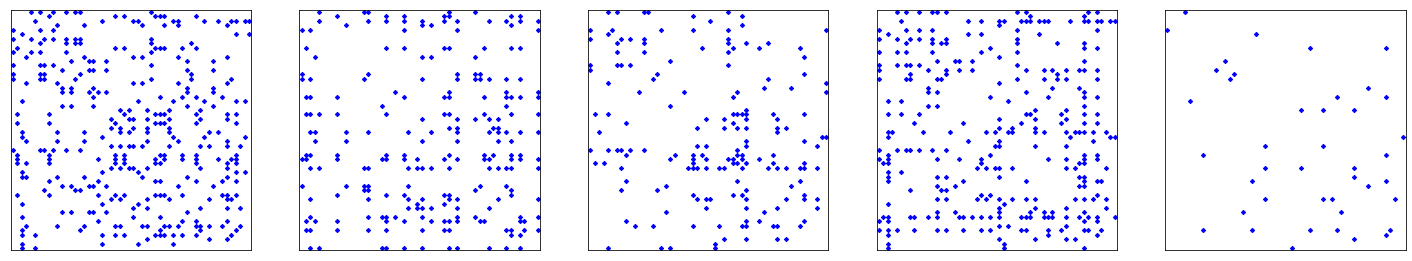

number of clusers  7
purity  0.9444444444444444
nmi  0.9054334578385913
ri  0.9622641509433962
best ranking is  (0, 1, 2, 3, 4)


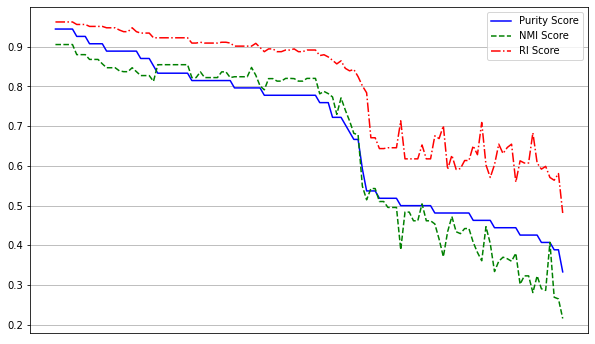

In [3]:
clustering_SC_SR("AUCS",verbose=True,node_size=100,markersize=3)

# MIT 

c:\Users\souhm\anaconda3\envs\NewEnv\lib\site-packages\numpy\core\_asarray.py:171: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return array(a, dtype, copy=False, order=order, subok=True)


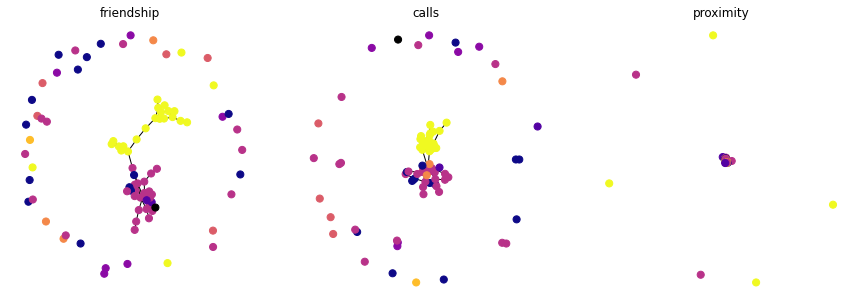

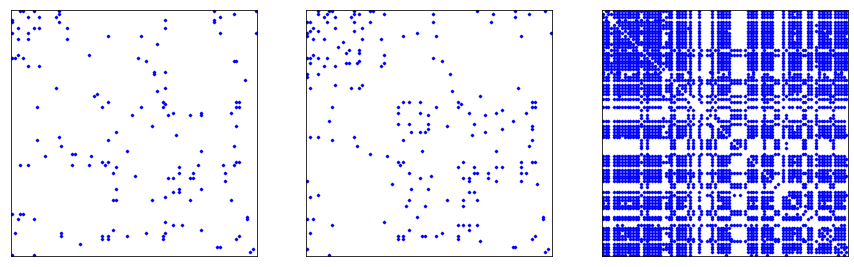

number of clusers  9
purity  0.43333333333333335
nmi  0.20151416167773886
ri  0.6249687890137329
best ranking is  (0, 1, 2)


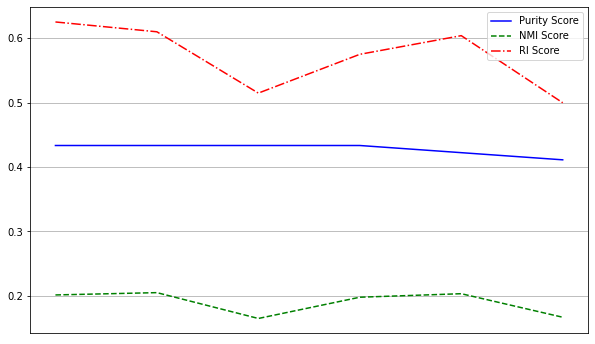

In [4]:
clustering_SC_SR("MIT",verbose=True,node_size=50,markersize=2)

# Cora

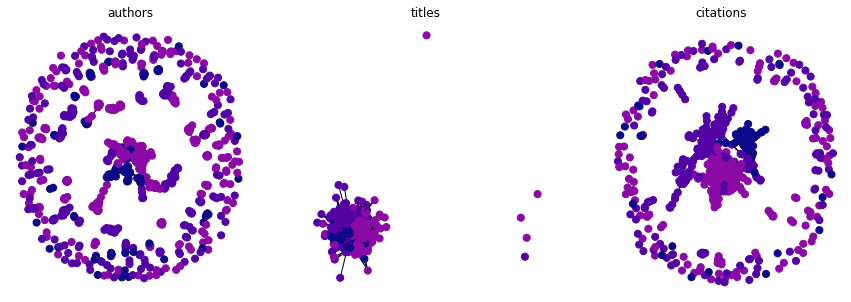

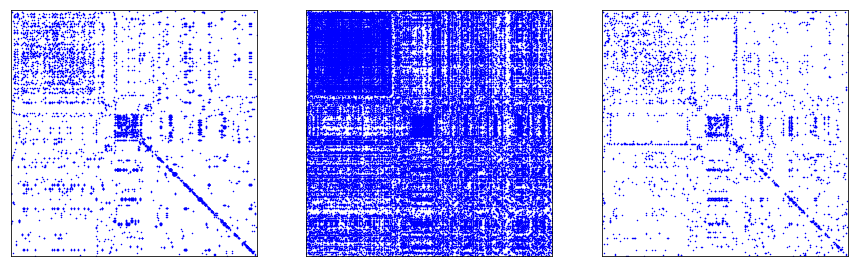

number of clusers  3
purity  0.5837957824639289
nmi  0.23814207794863526
ri  0.60020964360587
best ranking is  (2, 1, 0)


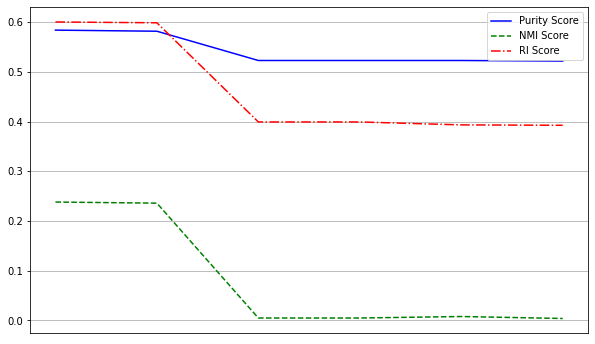

In [5]:
clustering_SC_SR("Cora",verbose=True,node_size=50,markersize=0.5)

# Cora small

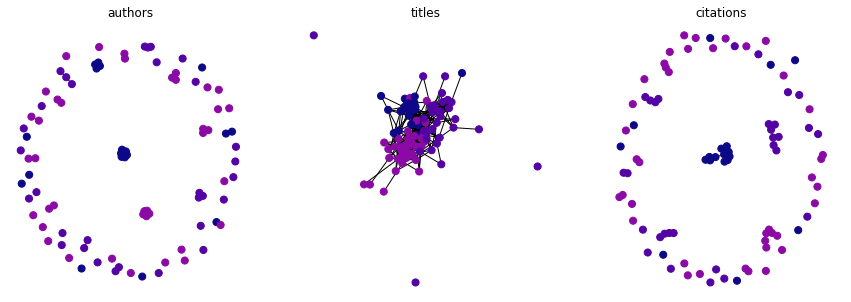

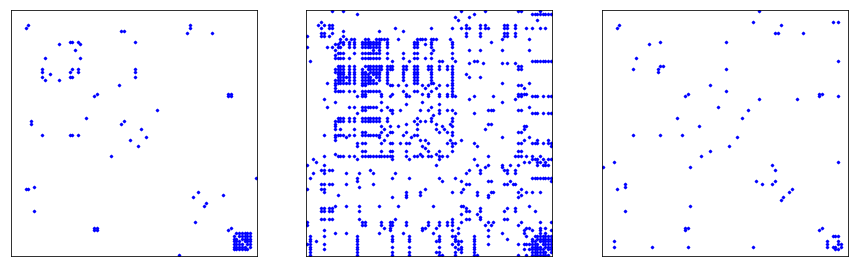

number of clusers  3
purity  0.5
nmi  0.11620334125092814
ri  0.47440699126092384
best ranking is  (2, 0, 1)


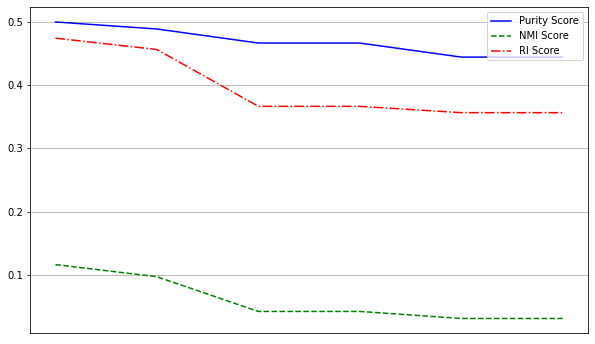

In [6]:
dataset = Dataset("Cora", extended=False, preprocess=False)
dataset.display(node_size=50,markersize=2)
W = dataset.MLG
k = np.unique(dataset.labels).shape[0]
_lambda = [1 for i in range(len(W)-1)]
true_labels = dataset.labels
ranking = [i for i in range(len(W))]
all_permutations = list(permutations(ranking))
N = len(true_labels)
print("number of clusers ",k)
ground_truth_clustering = {i: true_labels[i] for i in range(N)}

scores = list()
i = 0
rank = {}
for ranking in all_permutations:
    labels = SC_SR(W, k, _lambda, ranking)
    clustering = {i: labels[i] for i in range(N)}
    purity = purity_score(clustering, ground_truth_clustering)
    nmi = nmi_score(clustering, ground_truth_clustering)
    ri = ri_score(clustering, ground_truth_clustering)
    rank[i] = ranking
    scores.append((purity,nmi,ri))
    i+=1
    sorted_scores = sorted(scores, key=lambda x: x[0],reverse=True)
    purity_scores = [x[0] for x in sorted_scores]
    nmi_scores = [x[1] for x in sorted_scores]
    ri_scores = [x[2] for x in sorted_scores]
print("purity ",sorted_scores[0][0])
print("nmi ",sorted_scores[0][1])
print("ri ",sorted_scores[0][2])
print("best ranking is ",rank[scores.index(sorted_scores[0])])

plt.figure(figsize=(10, 6))
plt.plot(range(len(sorted_scores)), purity_scores, label="Purity Score", linestyle='-', color='blue', markersize=3)
plt.plot(range(len(sorted_scores)), nmi_scores, label="NMI Score", linestyle='--', color='green', markersize=3)
plt.plot(range(len(sorted_scores)), ri_scores, label="RI Score", linestyle='-.', color='red', markersize=3)
plt.legend(loc='upper right')
plt.grid(True)
plt.xticks([])
# Save the plot to a file (optional)
# plt.savefig('clustering_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()